### Analise Exploratória

#### Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

In [147]:
df = pd.read_csv("eta.csv", encoding="latin1", sep=";")
display(df.columns)
pd.set_option("display.max_columns", None)

C:\Users\guilhermetsouza-ieg\AppData\Local\Temp\ipykernel_21696\4294403942.py:1: DtypeWarning: Columns (5,6,7,9,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("eta.csv", encoding="latin1", sep=";")


Index(['Região Geográfica', 'UF', 'Regional de Saúde', 'Município',
       'Código IBGE', 'Tipo da Instituição', 'Sigla da Instituição',
       'Nome da Instituição', 'CNPJ da Instituição',
       'Nome do escritório regional/local',
       'CNPJ do escritório regional/local', 'Tipo da Forma de Abastecimento',
       'Código Forma de abastecimento', 'Nome da Forma de Abastecimento',
       'Nome da ETA', 'Ano de referência', 'Data de registro no Sisagua',
       'Data de preenchimento', 'Captação superficial', 'Captação subterrânea',
       'Captação de Água de chuva', 'CEP', 'Endereço', 'Número', 'DDD',
       'Telefone', 'EMAIL', 'Tempo médio diário de funcionamento',
       'Etapa pre-oxidação', 'Etapa mistura ráp. e coag.', 'Etapa floculação',
       'Etapa decantação', 'Etapa flotação', 'Tipo de filtração',
       'Número de filtros',
       'Impedimento de monitoramento por unidade filtrante',
       'Etapa desinfecção', 'Desinf. com cloro gás/hipoc.',
       'Desinf. com isocian

#### Entendimento Geral sobre o Dataset


In [148]:
df = df[['Vazão de água tratada', 'Região Geográfica', 'Tipo da Instituição',
        'Ano de referência', 'Data de registro no Sisagua',
         'Data de preenchimento', 'Tipo de filtração', 'Número de filtros', 'UF']]

# Quantidade de linhas e colunas
print(df.shape)

df.isna().sum().sort_values(ascending=False).head(20)

if "Número de filtros" in df.columns:
    df["Número de filtros"] = df["Número de filtros"].fillna(0)

if "Tipo da Instituição" in df.columns:
    df["Tipo da Instituição"] = df["Tipo da Instituição"].fillna("Não informado")

# Drop nas linhas que o tipo de filtração está como Sem Filtração
df = df[df["Tipo de filtração"] != "SEM FILTRAÇÃO"]

# Quantidade de linhas e colunas após tratamento de NaN
print(df.shape)

(881760, 9)
(92104, 9)


In [ ]:
display(df.head())

,Vazão de água tratada,Região Geográfica,Tipo da Instituição,Ano de referência,Data de registro no Sisagua,Data de preenchimento,Tipo de filtração,Número de filtros,UF
0,247.20,NORDESTE,Regional,2014,2014/02/18 14:12:25.000,2014/02/18 00:00:00.000,FILTRAÇÃO RÁPIDA,4.0,AL
1,56.80,SUL,Regional,2014,2014/03/28 13:10:33.000,2014/03/28 00:00:00.000,FILTRAÇÃO RÁPIDA,7.0,RS
5,50.30,SUL,Regional,2014,2014/03/28 15:55:40.000,2014/03/28 00:00:00.000,FILTRAÇÃO RÁPIDA,6.0,RS
6,136.00,SUL,Regional,2014,2014/03/28 15:55:40.000,2014/03/28 00:00:00.000,FILTRAÇÃO RÁPIDA,3.0,RS
8,30.00,SUL,Regional,2014,2014/03/28 16:53:42.000,2014/03/28 00:00:00.000,FILTRAÇÃO RÁPIDA,2.0,RS
...,...,...,...,...,...,...,...,...,...
881729,NaN,NORDESTE,Não informado,2025,2025/01/14 13:08:48.000,2025/01/14 00:00:00.000,FILTRAÇÃO EM MEMBRANAS,0.0,PB
881751,0.25,NORTE,Não informado,2025,2025/02/20 09:17:58.000,2025/02/20 00:00:00.000,FILTRAÇÃO RÁPIDA,1.0,PA
881752,1.00,NORTE,Não informado,2025,2025/02/20 09:29:47.000,2025/02/20 00:00:00.000,FILTRAÇÃO RÁPIDA,1.0,PA
881755,NaN,NORTE,Não informado,2025,2025/02/20 10:06:03.000,2025/02/20 00:00:00.000,FILTRAÇÃO RÁPIDA,2.0,PA


In [150]:
display(df['Número de filtros'].value_counts())

Número de filtros
1.0      32582
2.0      18598
4.0      13044
3.0       9246
5.0       4503
6.0       3682
8.0       2813
0.0       1528
10.0      1288
14.0       834
12.0       796
9.0        709
7.0        679
16.0       353
11.0       177
13.0       168
20.0       160
24.0       122
15.0       121
18.0        98
17.0        73
30.0        44
19.0        39
59.0        32
33.0        31
49.0        26
32.0        24
94.0        23
25.0        23
26.0        22
35.0        21
34.0        21
29.0        21
22.0        18
28.0        18
99.0        17
50.0        17
23.0        17
48.0        13
65.0        12
43.0        11
44.0        10
38.0         9
21.0         9
60.0         8
64.0         6
31.0         6
40.0         5
62.0         4
124.0        4
72.0         4
27.0         3
68.0         3
131.0        2
200.0        2
121.0        2
108.0        1
115.0        1
141.0        1
Name: count, dtype: int64

In [ ]:
print(df.info())
print(df.describe())

(92104, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 92104 entries, 0 to 881757
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Vazão de água tratada        73932 non-null  float64
 1   Região Geográfica            92104 non-null  object 
 2   Tipo da Instituição          92104 non-null  object 
 3   Ano de referência            92104 non-null  int64  
 4   Data de registro no Sisagua  92104 non-null  object 
 5   Data de preenchimento        92104 non-null  object 
 6   Tipo de filtração            92104 non-null  object 
 7   Número de filtros            92104 non-null  float64
 8   UF                           92104 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 7.0+ MB
None
       Vazão de água tratada  Ano de referência  Número de filtros
count           73932.000000       92104.000000       92104.000000
mean              240.843910        2019.94068

##### Quantidade de Instituições por Estado

In [152]:
print(df["UF"].value_counts())

UF
SP    15919
MG    14216
CE     8345
BA     6581
PE     5319
ES     4784
SC     4601
RS     4375
PA     4031
RJ     3368
PR     3199
GO     2669
PB     2551
MT     1905
RN     1544
TO     1458
PI     1295
MA     1282
RO      940
AM      933
SE      932
AL      814
MS      287
AP      254
AC      242
RR      146
DF      114
Name: count, dtype: int64


##### Distribuição Por Estado


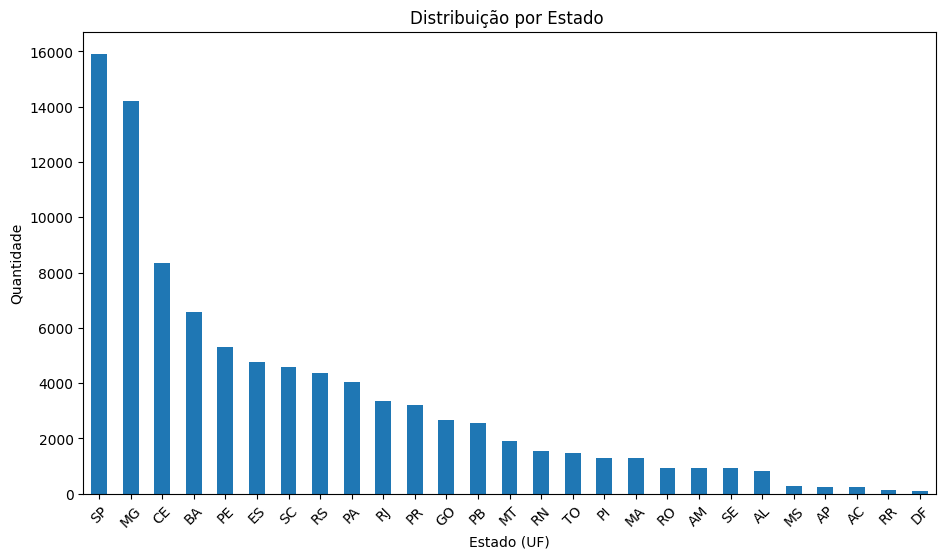

In [153]:
uf_counts = df["UF"].value_counts()

plt.figure(figsize=(11,6))
uf_counts.plot(kind="bar")

plt.title("Distribuição por Estado ")
plt.xlabel("Estado (UF)")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.show()


O gráfico acima representa a quantidade de ocorrências (ou registros) em cada Unidade Federativa (UF) do Brasil presente no conjunto de dados.

O eixo X (horizontal) mostra os estados (UF) — por exemplo, SP, RJ, MG, etc.

O eixo Y (vertical) indica a quantidade de registros associados a cada estado.

Cada barra representa o total de ocorrências para uma determinada UF.

As barras mais altas indicam estados com maior número de registros, enquanto as mais baixas mostram aqueles com menor participação.

Esse tipo de gráfico facilita a comparação visual entre os estados, permitindo identificar quais regiões têm maior representatividade nos dados analisados.

##### Percentual de instituições Locais e Regionais


In [154]:
print(df['Tipo da Instituição'].value_counts(normalize=True) * 100)

Tipo da Instituição
Regional         49.279076
Local            45.965430
Não informado     4.755494
Name: proportion, dtype: float64


#### ETAs por região


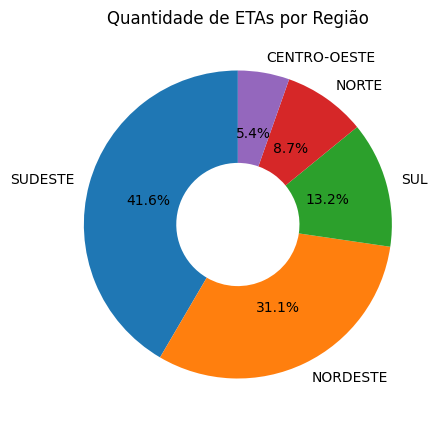

In [155]:
counts = df["Região Geográfica"].value_counts()

plt.figure(figsize=(8,5))
plt.pie(counts, 
        labels=counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        wedgeprops={'width':0.6})  

plt.title("Quantidade de ETAs por Região")
plt.show()


O gráfico acima apresenta a distribuição percentual das ETAs (Estações de Tratamento de Água) entre as diferentes Regiões Geográficas do Brasil.

Cada fatia do gráfico de rosca representa uma região, mostrando sua proporção em relação ao total de ETAs.

Formato: Gráfico de rosca (pizza com centro vazado)

Eixo: Representação percentual (sem eixo cartesiano)

Legenda: Cada rótulo indica o nome da região

Interpretação: Regiões com fatias maiores possuem maior concentração de ETAs no conjunto de dados

##### Histograma de Vazão de Água Tratata

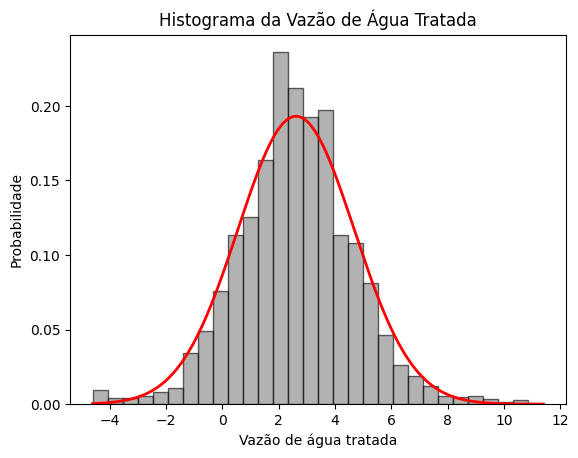

In [156]:
dados = df["Vazão de água tratada"].dropna()
dados = dados[dados > 0]

dados_log = np.log(dados)

plt.hist(dados_log, bins=30, density=True, alpha=0.6, color='gray', edgecolor='black')

media, desvio = np.mean(dados_log), np.std(dados_log)
x = np.linspace(min(dados_log), max(dados_log), 1000)
pdf = norm.pdf(x, media, desvio)

plt.plot(x, pdf, 'r-', linewidth=2)

plt.xlabel("Vazão de água tratada")
plt.ylabel("Probabilidade")
plt.title("Histograma da Vazão de Água Tratada")
plt.show()


O gráfico abaixo mostra a distribuição logarítmica da variável “Vazão de água tratada”.
Esse tipo de análise é útil quando os dados possuem grande variação de magnitude (por exemplo, algumas ETAs tratam muito mais água que outras), tornando o logaritmo uma boa transformação para visualizar melhor o comportamento geral.

🧩 Etapas do código

Remoção de valores nulos e zeros:
Apenas valores positivos e não nulos são considerados.

Transformação logarítmica:
Aplica-se o log natural para reduzir a assimetria dos dados.

Plotagem do histograma:
Mostra a distribuição dos valores transformados.

Ajuste da distribuição normal:
Uma curva normal (vermelha) é sobreposta para comparar o formato dos dados com uma distribuição teórica normal.

📈 Interpretação

O eixo X representa a vazão de água tratada (em escala logarítmica).

O eixo Y mostra a densidade de probabilidade.

A curva vermelha indica a distribuição normal ajustada com base na média e desvio padrão dos dados log-transformados.

Se o histograma se aproxima da curva vermelha, os dados seguem aproximadamente uma distribuição log-normal.

##### Vazão média por região

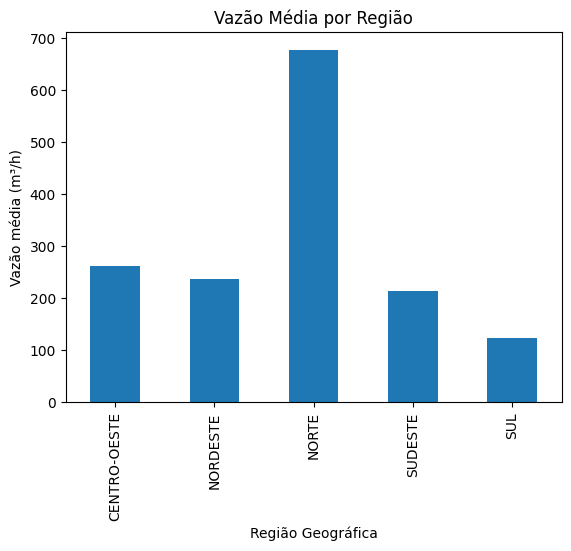

In [157]:
df.groupby("Região Geográfica")["Vazão de água tratada"].mean().plot(kind="bar")
plt.title("Vazão Média por Região")
plt.ylabel("Vazão média (m³/h)")
plt.show()

O gráfico acima apresenta a vazão média de água tratada (em m³/h) em cada Região Geográfica do Brasil.
Esse tipo de visualização permite comparar o desempenho médio das Estações de Tratamento de Água (ETAs) entre as regiões.

🧩 Etapas do código

Agrupamento dos dados:
O conjunto é agrupado pela coluna “Região Geográfica”.

Cálculo da média:
É calculada a média da vazão de água tratada para cada região.

Plotagem em gráfico de barras:
Cada barra representa a vazão média da respectiva região.

📈 Interpretação

O eixo X representa as Regiões Geográficas (Norte, Nordeste, Centro-Oeste, Sudeste, Sul).

O eixo Y indica a vazão média tratada em m³/h.

As barras mais altas mostram regiões com maior capacidade média de tratamento, enquanto as mais baixas indicam menor desempenho médio.

##### Tipos de filtração por região (barras empilhadas)


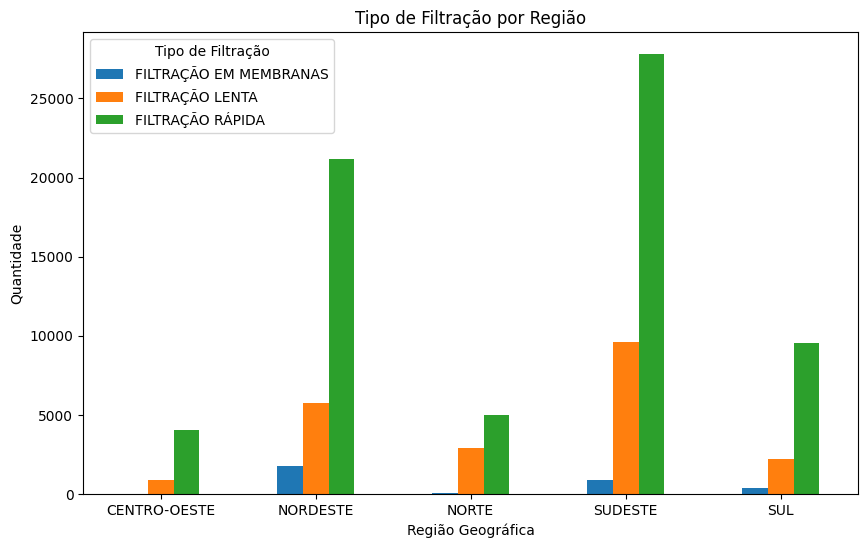

In [158]:
ct = pd.crosstab(df["Região Geográfica"], df["Tipo de filtração"])

ct.plot(kind="bar", stacked=False, figsize=(10,6))

plt.title("Tipo de Filtração por Região")
plt.ylabel("Quantidade")
plt.xlabel("Região Geográfica")
plt.xticks(rotation=0)
plt.legend(title="Tipo de Filtração")
plt.show()

O gráfico acim mostra a distribuição dos tipos de filtração utilizados nas Estações de Tratamento de Água (ETAs) em cada Região Geográfica do Brasil.

Ele permite comparar como os diferentes métodos de filtração estão distribuídos pelo país.

🧩 Etapas do código

Criação de uma tabela cruzada (crosstab):
Conta quantas ETAs existem em cada combinação de Região Geográfica e Tipo de Filtração.

Plotagem do gráfico de barras:
Cada grupo de barras representa uma região e mostra as quantidades de cada tipo de filtração.

Personalização visual:
Foram adicionados título, rótulos dos eixos, legenda e rotação dos rótulos do eixo X para melhor leitura.

📊 Interpretação

O eixo X representa as Regiões Geográficas do Brasil.

O eixo Y mostra a quantidade de ETAs.

Cada cor representa um tipo de filtração (por exemplo: rápida, lenta, sem filtração, etc.).

A comparação horizontal permite observar quais regiões utilizam mais ou menos determinados tipos de filtração.

Se as barras de uma cor específica são mais altas em uma região, isso indica maior prevalência daquele tipo de filtração nessa área.

##### Vazão média por tipo de instituição

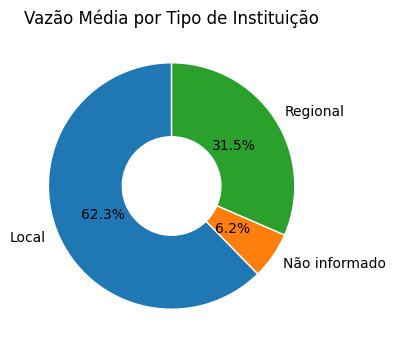

In [159]:
media_vazao = df.groupby("Tipo da Instituição")["Vazão de água tratada"].mean()

plt.figure(figsize=(4,4))
plt.pie(
    media_vazao, 
    labels=media_vazao.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    wedgeprops={'width':0.6, 'edgecolor':'w'}
)
plt.title("Vazão Média por Tipo de Instituição")
plt.show()

O gráfico acima mostra a proporção da vazão média de água tratada (em m³/h) de acordo com o Tipo de Instituição responsável pelas ETAs (Estações de Tratamento de Água).

Cada setor do gráfico representa a participação percentual de cada tipo de instituição na vazão média total.

🧩 Etapas do código

Agrupamento dos dados:
O DataFrame é agrupado por “Tipo da Instituição”.

Cálculo da média:
É calculada a vazão média de água tratada para cada tipo de instituição.

Geração do gráfico de rosca:
O gráfico é criado com plt.pie(), utilizando wedgeprops={'width':0.6} para deixar o centro vazado.

Rótulos e percentuais:
Cada fatia mostra o nome da instituição e sua porcentagem sobre o total.

📊 Interpretação

Cada fatia do gráfico representa um tipo de instituição (por exemplo: pública, privada, mista etc.).

O tamanho da fatia indica a contribuição média desse tipo para o total da vazão de água tratada.

Fatia maior → maior vazão média, indicando maior capacidade operacional dessas instituições.

##### ETAs cadastradas por ano


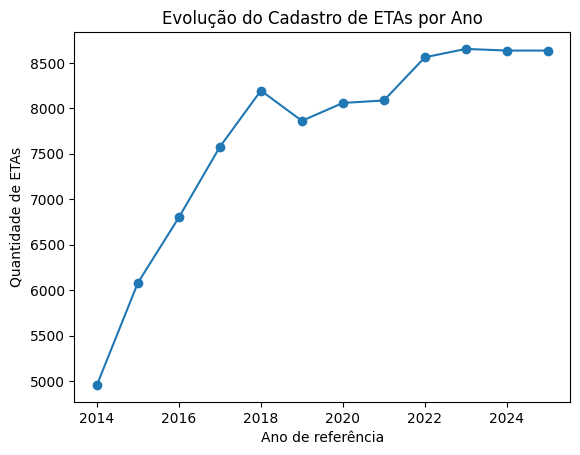

In [160]:
df["Ano de referência"].value_counts().sort_index().plot(kind="line", marker="o")
plt.title("Evolução do Cadastro de ETAs por Ano")
plt.ylabel("Quantidade de ETAs")
plt.show()


O gráfico acima mostra a quantidade de Estações de Tratamento de Água (ETAs) cadastradas ao longo dos anos, permitindo observar tendências históricas no cadastro dessas estações.

🧩 Etapas do código

Contagem por ano:
Conta quantas ETAs existem para cada Ano de referência.

Ordenação cronológica:
sort_index() garante que os anos sejam apresentados em ordem crescente.

Plotagem da linha:
O gráfico de linha (kind="line") com marcadores (marker="o") facilita a visualização da variação ano a ano.

📊 Interpretação

O eixo X representa os anos de referência do cadastro das ETAs.

O eixo Y indica a quantidade de ETAs cadastradas em cada ano.

Tendência ascendente indica crescimento no número de estações cadastradas ao longo do tempo.

Tendência descendente ou platô pode indicar redução ou estabilização no registro de novas ETAs.

##### Vazão média por ano

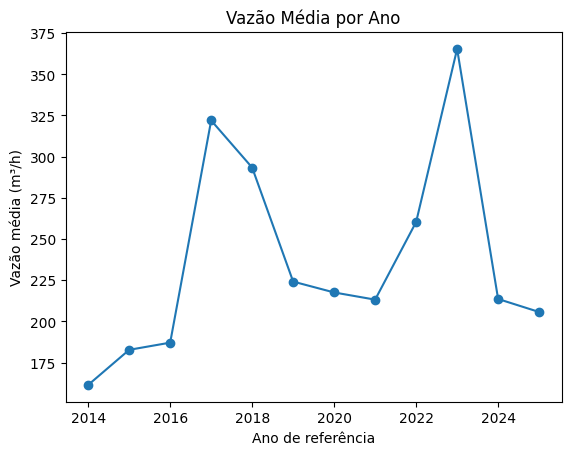

In [161]:
df.groupby("Ano de referência")["Vazão de água tratada"].mean().plot(kind="line", marker="o")
plt.title("Vazão Média por Ano")
plt.ylabel("Vazão média (m³/h)")
plt.show()

O gráfico acima mostra a evolução da vazão média de água tratada (em m³/h) das Estações de Tratamento de Água (ETAs) ao longo dos anos, permitindo acompanhar mudanças na capacidade média de tratamento.

🧩 Etapas do código

Agrupamento por ano:
Os dados são agrupados pela coluna “Ano de referência”.

Cálculo da média:
Calcula-se a vazão média de água tratada em cada ano.

Plotagem do gráfico de linha:
kind="line" com marcadores (marker="o") facilita a visualização das variações ano a ano.

📊 Interpretação

O eixo X representa os anos de referência.

O eixo Y indica a vazão média tratada (m³/h).

O gráfico mostra tendências de aumento ou diminuição da vazão média, permitindo identificar se as ETAs estão tratando mais ou menos água em média ao longo do tempo.

##### Evolução da Vazão de agua por ano e por regiao

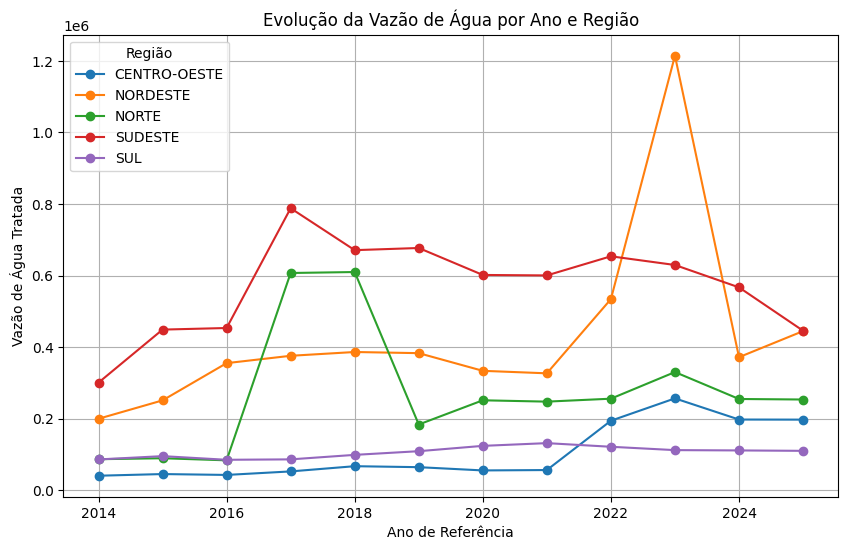

In [162]:
df_grouped = df.groupby(["Ano de referência","Região Geográfica"])["Vazão de água tratada"].sum().reset_index()

df_pivot = df_grouped.pivot(index="Ano de referência", columns="Região Geográfica", values="Vazão de água tratada")

df_pivot.plot(kind="line", marker="o", figsize=(10,6))
plt.title("Evolução da Vazão de Água por Ano e Região")
plt.xlabel("Ano de Referência")
plt.ylabel("Vazão de Água Tratada")
plt.legend(title="Região")
plt.grid(True)
plt.show()



O gráfico acima mostra a evolução da vazão total de água tratada (em m³/h) ao longo dos anos, separada por Região Geográfica.
Esse tipo de análise permite comparar a capacidade de tratamento de água entre diferentes regiões ao longo do tempo.

🧩 Etapas do código

Agrupamento por ano e região:
Soma-se a vazão de água tratada para cada combinação de Ano de referência e Região Geográfica.

Pivotagem dos dados:
Cria-se uma tabela com anos como índice e regiões como colunas, facilitando a plotagem de múltiplas linhas.

Plotagem do gráfico de linhas:
Cada linha representa uma região geográfica, com marcadores (marker="o") indicando os valores por ano.

Personalização:
Título, rótulos dos eixos, legenda e grade foram adicionados para melhor interpretação.

📊 Interpretação

O eixo X representa os anos de referência.

O eixo Y indica a vazão total de água tratada.

Cada linha colorida mostra a evolução da vazão em uma região específica.

Permite observar quais regiões tiveram maior crescimento ou redução na vazão tratada ao longo do tempo.

##### Scatterplot Vazão x Número de filtros


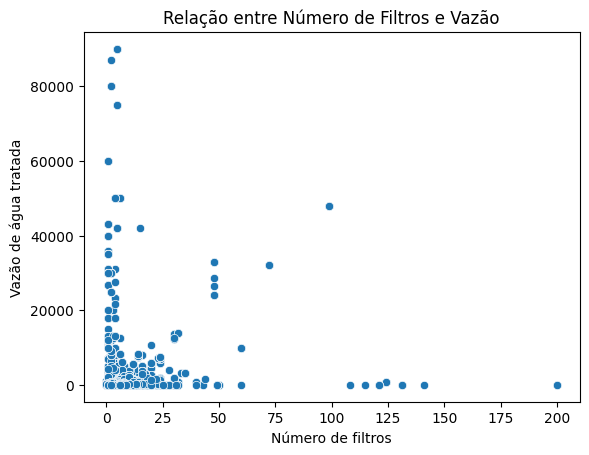

In [163]:
sns.scatterplot(x="Número de filtros", y="Vazão de água tratada", data=df)
plt.title("Relação entre Número de Filtros e Vazão")
plt.show()

O gráfico acima é um scatter plot (gráfico de dispersão) que mostra a relação entre o número de filtros em uma ETA e a vazão de água tratada (m³/h).
Esse tipo de gráfico é útil para identificar tendências, padrões ou possíveis correlações entre duas variáveis numéricas.

🧩 Etapas do código

Seleção das variáveis:
Número de filtros no eixo X e Vazão de água tratada no eixo Y.

Plotagem do scatter plot:
Cada ponto representa uma ETA individual.

Customização:
Adiciona-se um título para contextualizar a relação observada.

📊 Interpretação

O eixo X representa o número de filtros na estação.

O eixo Y representa a vazão de água tratada.

Distribuição dos pontos:

Se os pontos seguem uma tendência ascendente, indica que mais filtros podem estar associados a maior vazão.

Se os pontos estiverem dispersos sem padrão, não há relação clara entre as variáveis.